## Imports

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from math import sqrt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

## Data Creation + Scaling

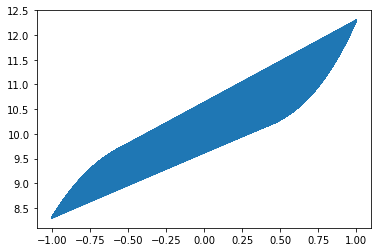

In [49]:
def y_function(x):
    y = 0.2*x**4 + 2*x**3 + 0.1*x**2 + 10
    return y

def generate_data(start, end, samples, shuf=False):
    data = np.linspace(start, end, samples)
    
    if shuf == True:
        data = shuffle(data)
        
    return data

x = generate_data(-1, 1, 30000, True)
y = y_function(x)

x_unshuffled = generate_data(-1, 1, 30000)
y_unshuffled = y_function(x_unshuffled)

x_scaled = np.interp(x, (x.min(), x.max()), (0, 1))
y_scaled = np.interp(y, (y.min(), y.max()), (0, 1))

x_scaled_unshuffled = np.interp(x, (x.min(), x.max()), (0, 1))
y_scaled_unshuffled = np.interp(y, (y.min(), y.max()), (0, 1))

plt.plot(x,y)

## Data Separation

In [50]:
def split_data(x, y):
    # Splits x and y into 0.5:0.5 - train:test split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
    
    # Splits remaining x_train and y_train into 0.3:0.2 - train:validation split
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.4)
    return x_train, x_test, x_val, y_train, y_test, y_val

# Unscaled Data Separation
x_train, x_test, x_val, y_train, y_test, y_val = split_data(x, y)

# Scaled Data Separation
x_train_scaled, x_test_scaled, x_val_scaled, y_train_scaled, y_test_scaled, y_val_scaled = split_data(x_scaled, y_scaled)

# Unscaled Unshuffled Data Separation
x_train_unshuffled, x_test_unshuffled, x_val_unshuffled, y_train_unshuffled, y_test_unshuffled, y_val_unshuffled = split_data(x_unshuffled, y_unshuffled)

# Scaled Ushuffled Data Separation
x_train_scaled_unshuffled, x_test_scaled_unshuffled, x_val_scaled_unshuffled, y_train_scaled_unshuffled, y_test_scaled_unshuffled, y_val_scaled_unshuffled = split_data(x_scaled_unshuffled, y_scaled_unshuffled)


## Metric Functions

In [51]:
def mae(predicted, actual):
    mae = 0
    for i in range(len(actual)):
        mae += abs(predicted[i] - actual[i])
    return mae/len(actual)

def mse(predicted, actual):
    mse = 0
    for i in range(len(actual)):
        mse += ((predicted[i] - actual[i]) ** 2)
    return mse/len(actual)
    
def rmse(predicted, actual):
    rmse = 0
    for i in range(len(actual)):
        rmse += ((predicted[i] - actual[i]) ** 2)
    return sqrt(rmse/len(actual))
    
def r2(predicted, actual):
    e1, e2, r2, = 0, 0, 1
    for i in range(len(actual)):
        e1 += ((predicted[i] - actual[i]) ** 2)
        e2 += ((actual[i] - np.mean(actual)) ** 2)
    return (r2 - e1/e2)

## Neural Network Models

In [52]:
def build_model_one(activation):
    model = keras.Sequential([
        layers.Dense(12, activation=activation, input_shape=[len(x_train), 1]),
        layers.Dense(8, activation=activation),
        layers.Dense(4, activation=activation),
        layers.Dense(1)])
    
    model.compile(loss='mse',
                  optimizer='adam',
                  metrics=['mae', 'mse'])
    
    return model
    
def build_model_two(activation):
    model = keras.Sequential([
        layers.Dense(24, activation=activation, input_shape=[len(x_train), 1]),
        layers.Dense(1)])
    
    model.compile(loss='mse',
                  optimizer='adam',
                  metrics=['mae', 'mse'])
        
    return model

## Case 1: 

- Data: Shuffled and unscaled 
- NN structureL Structure 1
- Activation Function: Relu
## +

## Case 6:
- Data: Unshuffled and unscaled 
- NN structureL Structure 1
- Activation Function: Relu

Epoch 1/20
750/750 [==============================] - 1s 926us/step - loss: 26.6408 - mae: 3.4687 - mse: 26.6408 - val_loss: 0.2675 - val_mae: 0.3657 - val_mse: 0.2675
Epoch 2/20
750/750 [==============================] - 1s 766us/step - loss: 0.1791 - mae: 0.3090 - mse: 0.1791 - val_loss: 0.1286 - val_mae: 0.2720 - val_mse: 0.1286
Epoch 3/20
750/750 [==============================] - 1s 720us/step - loss: 0.0780 - mae: 0.2102 - mse: 0.0780 - val_loss: 0.0441 - val_mae: 0.1608 - val_mse: 0.0441
Epoch 4/20
750/750 [==============================] - 1s 734us/step - loss: 0.0275 - mae: 0.1253 - mse: 0.0275 - val_loss: 0.0200 - val_mae: 0.1058 - val_mse: 0.0200
Epoch 5/20
750/750 [==============================] - 1s 715us/step - loss: 0.0134 - mae: 0.0860 - mse: 0.0134 - val_loss: 0.0088 - val_mae: 0.0681 - val_mse: 0.0088
Epoch 6/20
750/750 [==============================] - 1s 724us/step - loss: 0.0056 - mae: 0.0542 - mse: 0.0056 - val_loss: 0.0040 - val_mae: 0.0475 - val_mse: 0.0040
Ep

750/750 [==============================] - 1s 800us/step - loss: 4.1318e-04 - mae: 0.0144 - mse: 4.1318e-04 - val_loss: 3.1414e-04 - val_mae: 0.0134 - val_mse: 3.1414e-04
Epoch 16/20
750/750 [==============================] - 1s 701us/step - loss: 3.7447e-04 - mae: 0.0140 - mse: 3.7447e-04 - val_loss: 3.0568e-04 - val_mae: 0.0122 - val_mse: 3.0568e-04
Epoch 17/20
750/750 [==============================] - 1s 720us/step - loss: 3.6805e-04 - mae: 0.0141 - mse: 3.6805e-04 - val_loss: 4.0558e-04 - val_mae: 0.0153 - val_mse: 4.0558e-04
Epoch 18/20
750/750 [==============================] - 1s 727us/step - loss: 3.3349e-04 - mae: 0.0134 - mse: 3.3349e-04 - val_loss: 2.5187e-04 - val_mae: 0.0118 - val_mse: 2.5187e-04
Epoch 19/20
750/750 [==============================] - 1s 724us/step - loss: 3.2984e-04 - mae: 0.0135 - mse: 3.2984e-04 - val_loss: 2.8415e-04 - val_mae: 0.0129 - val_mse: 2.8415e-04
Epoch 20/20
750/750 [==============================] - 1s 725us/step - loss: 3.1993e-04 - mae: 0.

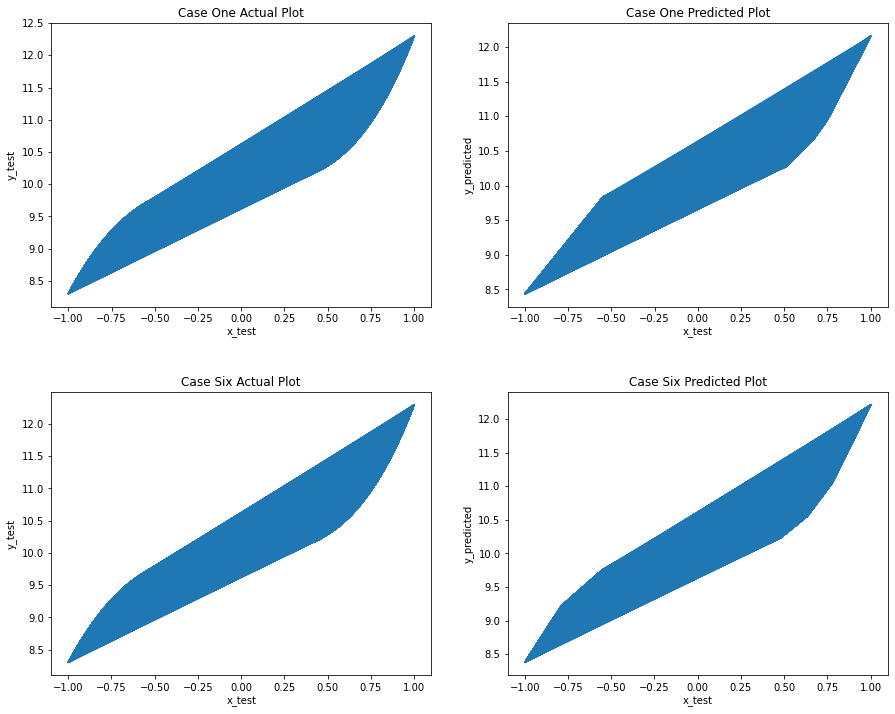

In [63]:
# Building the model for case 1:
case_one = build_model_one('relu')

# Fitting case one model with data set
case_one.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_val, y_val))

# Predicting values using the first neural network
predicted_one = case_one.predict(x_test).reshape(15000)

# Plotting the two graphs 
fig, pos = plt.subplots(2, 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.3)

# Actual test data plot
pos[0, 0].set_title(f'Case One Actual Plot')
pos[0, 0].set(xlabel='x_test', ylabel='y_test')
pos[0, 0].plot(x_test, y_test)

# Predicted data plot
pos[0, 1].set_title(f'Case One Predicted Plot')
pos[0, 1].set(xlabel='x_test', ylabel='y_predicted')
pos[0, 1].plot(x_test, predicted_one)

# Building the model for case 6:
case_six = build_model_one('relu')

# Fitting case one model with data set
case_six.fit(x_train_unshuffled, y_train_unshuffled, epochs=20, batch_size=12, validation_data=(x_val_unshuffled, y_val_unshuffled))

# Predicting values using the first neural network
predicted_six = case_six.predict(x_test_unshuffled).reshape(15000)

# Actual test data plot
pos[1, 0].set_title(f'Case Six Actual Plot')
pos[1, 0].set(xlabel='x_test', ylabel='y_test')
pos[1, 0].plot(x_test_unshuffled, y_test_unshuffled)

# Predicted data plot
pos[1, 1].set_title(f'Case Six Predicted Plot')
pos[1, 1].set(xlabel='x_test', ylabel='y_predicted')
pos[1, 1].plot(x_test_unshuffled, predicted_six)

# Metrics Calculations
mae_one, mse_one, rmse_one, r2_one = mae(predicted_one, y_test), mse(predicted_one, y_test), rmse(predicted_one, y_test), r2(predicted_one, y_test)
print(f'Calculated mae value for case 1: {mae_one}')
print(f'Calculated mse value for case 1: {mse_one}')
print(f'Calculated rmse value for case 1: {rmse_one}')
print(f'Calculated r2 value for case 1: {r2_one}')

mae_six, mse_six, rmse_six, r2_six = mae(predicted_six, y_test_unshuffled), mse(predicted_six, y_test_unshuffled), rmse(predicted_six, y_test_unshuffled), r2(predicted_six, y_test_unshuffled)
print(f'Calculated mae value for case 6: {mae_six}')
print(f'Calculated mse value for case 6: {mse_six}')
print(f'Calculated rmse value for case 6: {rmse_six}')
print(f'Calculated r2 value for case 6: {r2_six}')

## Case 2: 
- Data: Shuffled and unscaled 
- NN structure: Structure 2
- Activation Function: relu

## +

## Case 7:
- Data: Unshuffled and unscaled 
- NN structure: Structure 2
- Activation Function: relu

Epoch 1/20
750/750 [==============================] - 1s 764us/step - loss: 39.1429 - mae: 5.3244 - mse: 39.1429 - val_loss: 0.3565 - val_mae: 0.5185 - val_mse: 0.3565
Epoch 2/20
750/750 [==============================] - 1s 672us/step - loss: 0.1052 - mae: 0.2660 - mse: 0.1052 - val_loss: 0.0812 - val_mae: 0.2439 - val_mse: 0.0812
Epoch 3/20
750/750 [==============================] - 0s 631us/step - loss: 0.0743 - mae: 0.2321 - mse: 0.0743 - val_loss: 0.0664 - val_mae: 0.2197 - val_mse: 0.0664
Epoch 4/20
750/750 [==============================] - 0s 630us/step - loss: 0.0614 - mae: 0.2113 - mse: 0.0614 - val_loss: 0.0564 - val_mae: 0.1991 - val_mse: 0.0564
Epoch 5/20
750/750 [==============================] - 0s 626us/step - loss: 0.0528 - mae: 0.1958 - mse: 0.0528 - val_loss: 0.0484 - val_mae: 0.1861 - val_mse: 0.0484
Epoch 6/20
750/750 [==============================] - 0s 633us/step - loss: 0.0445 - mae: 0.1779 - mse: 0.0445 - val_loss: 0.0397 - val_mae: 0.1696 - val_mse: 0.0397
Ep

Epoch 16/20
750/750 [==============================] - 0s 622us/step - loss: 0.0020 - mae: 0.0348 - mse: 0.0020 - val_loss: 0.0021 - val_mae: 0.0361 - val_mse: 0.0021
Epoch 17/20
750/750 [==============================] - 0s 623us/step - loss: 0.0019 - mae: 0.0337 - mse: 0.0019 - val_loss: 0.0018 - val_mae: 0.0340 - val_mse: 0.0018
Epoch 18/20
750/750 [==============================] - 0s 619us/step - loss: 0.0018 - mae: 0.0328 - mse: 0.0018 - val_loss: 0.0017 - val_mae: 0.0310 - val_mse: 0.0017
Epoch 19/20
750/750 [==============================] - 0s 614us/step - loss: 0.0018 - mae: 0.0329 - mse: 0.0018 - val_loss: 0.0016 - val_mae: 0.0296 - val_mse: 0.0016
Epoch 20/20
750/750 [==============================] - 0s 614us/step - loss: 0.0017 - mae: 0.0320 - mse: 0.0017 - val_loss: 0.0016 - val_mae: 0.0292 - val_mse: 0.0016
Calculated mae value for case 2: 0.040430383676861
Calculated mse value for case 2: 0.003000137489539646
Calculated rmse value for case 2: 0.05477351083817474
Calcul

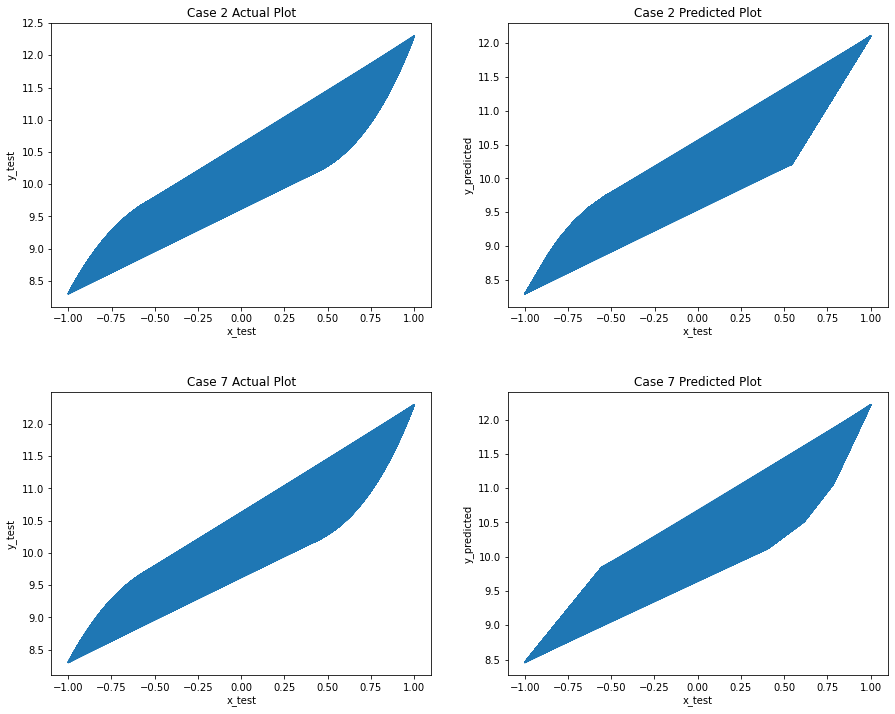

In [54]:
# Building the model for case 1:
case_two = build_model_two('relu')

# Fitting case one model with data set
case_two.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_val, y_val))

# Predicting values using the first neural network
predicted_two = case_two.predict(x_test).reshape(15000)

# Plotting the two graphs 
fig, pos = plt.subplots(2, 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.3)

# Actual test data plot
pos[0, 0].set_title(f'Case 2 Actual Plot')
pos[0, 0].set(xlabel='x_test', ylabel='y_test')
pos[0, 0].plot(x_test, y_test)

# Predicted data plot
pos[0, 1].set_title(f'Case 2 Predicted Plot')
pos[0, 1].set(xlabel='x_test', ylabel='y_predicted')
pos[0, 1].plot(x_test, predicted_two)

# Building the model for case 7:
case_seven = build_model_two('relu')

# Fitting case one model with data set
case_seven.fit(x_train_unshuffled, y_train_unshuffled, epochs=20, batch_size=12, validation_data=(x_val_unshuffled, y_val_unshuffled))

# Predicting values using the first neural network
predicted_seven = case_seven.predict(x_test_unshuffled).reshape(15000)

# Actual test data plot
pos[1, 0].set_title(f'Case 7 Actual Plot')
pos[1, 0].set(xlabel='x_test', ylabel='y_test')
pos[1, 0].plot(x_test_unshuffled, y_test_unshuffled)

# Predicted data plot
pos[1, 1].set_title(f'Case 7 Predicted Plot')
pos[1, 1].set(xlabel='x_test', ylabel='y_predicted')
pos[1, 1].plot(x_test_unshuffled, predicted_seven)

# Metrics Calculations
mae_two, mse_two, rmse_two, r2_two = mae(predicted_two, y_test), mse(predicted_two, y_test), rmse(predicted_two, y_test), r2(predicted_two, y_test)
print(f'Calculated mae value for case 2: {mae_two}')
print(f'Calculated mse value for case 2: {mse_two}')
print(f'Calculated rmse value for case 2: {rmse_two}')
print(f'Calculated r2 value for case 2: {r2_two}')


mae_seven, mse_seven, rmse_seven, r2_seven = mae(predicted_seven, y_test_unshuffled), mse(predicted_seven, y_test_unshuffled), rmse(predicted_seven, y_test_unshuffled), r2(predicted_seven, y_test_unshuffled)
print(f'Calculated mae value for case 7: {mae_seven}')
print(f'Calculated mse value for case 7: {mse_seven}')
print(f'Calculated rmse value for case 7: {rmse_seven}')
print(f'Calculated r2 value for case 7: {r2_seven}')

## Case 3: 
- Data: Shuffled and unscaled 
- NN structure: Structure 1
- Activation Function: tanh

## Case 8:
- Data: Shuffled and unscaled 
- NN structure: Structure 1
- Activation Function: tanh

Epoch 1/20
750/750 [==============================] - 1s 885us/step - loss: 38.8717 - mae: 5.9482 - mse: 38.8717 - val_loss: 15.2188 - val_mae: 3.8277 - val_mse: 15.2188
Epoch 2/20
750/750 [==============================] - 1s 728us/step - loss: 7.7828 - mae: 2.6032 - mse: 7.7828 - val_loss: 2.9974 - val_mae: 1.5630 - val_mse: 2.9974
Epoch 3/20
750/750 [==============================] - 1s 691us/step - loss: 1.5079 - mae: 1.0107 - mse: 1.5079 - val_loss: 0.7328 - val_mae: 0.6429 - val_mse: 0.7328
Epoch 4/20
750/750 [==============================] - 1s 712us/step - loss: 0.6183 - mae: 0.5397 - mse: 0.6183 - val_loss: 0.5683 - val_mae: 0.4959 - val_mse: 0.5683
Epoch 5/20
750/750 [==============================] - 1s 702us/step - loss: 0.5001 - mae: 0.4638 - mse: 0.5001 - val_loss: 0.3087 - val_mae: 0.3698 - val_mse: 0.3087
Epoch 6/20
750/750 [==============================] - 1s 753us/step - loss: 0.2599 - mae: 0.3291 - mse: 0.2599 - val_loss: 0.2043 - val_mae: 0.2720 - val_mse: 0.2043


Epoch 15/20
750/750 [==============================] - 1s 708us/step - loss: 8.0711e-04 - mae: 0.0198 - mse: 8.0711e-04 - val_loss: 5.4037e-04 - val_mae: 0.0166 - val_mse: 5.4037e-04
Epoch 16/20
750/750 [==============================] - 1s 693us/step - loss: 6.8461e-04 - mae: 0.0190 - mse: 6.8461e-04 - val_loss: 4.4417e-04 - val_mae: 0.0154 - val_mse: 4.4417e-04
Epoch 17/20
750/750 [==============================] - 1s 702us/step - loss: 5.6637e-04 - mae: 0.0175 - mse: 5.6637e-04 - val_loss: 6.2839e-04 - val_mae: 0.0202 - val_mse: 6.2839e-04
Epoch 18/20
750/750 [==============================] - 1s 703us/step - loss: 4.5997e-04 - mae: 0.0159 - mse: 4.5997e-04 - val_loss: 5.8453e-04 - val_mae: 0.0192 - val_mse: 5.8453e-04
Epoch 19/20
750/750 [==============================] - 1s 708us/step - loss: 3.8229e-04 - mae: 0.0147 - mse: 3.8229e-04 - val_loss: 3.1180e-04 - val_mae: 0.0144 - val_mse: 3.1180e-04
Epoch 20/20
750/750 [==============================] - 1s 748us/step - loss: 3.2069e-

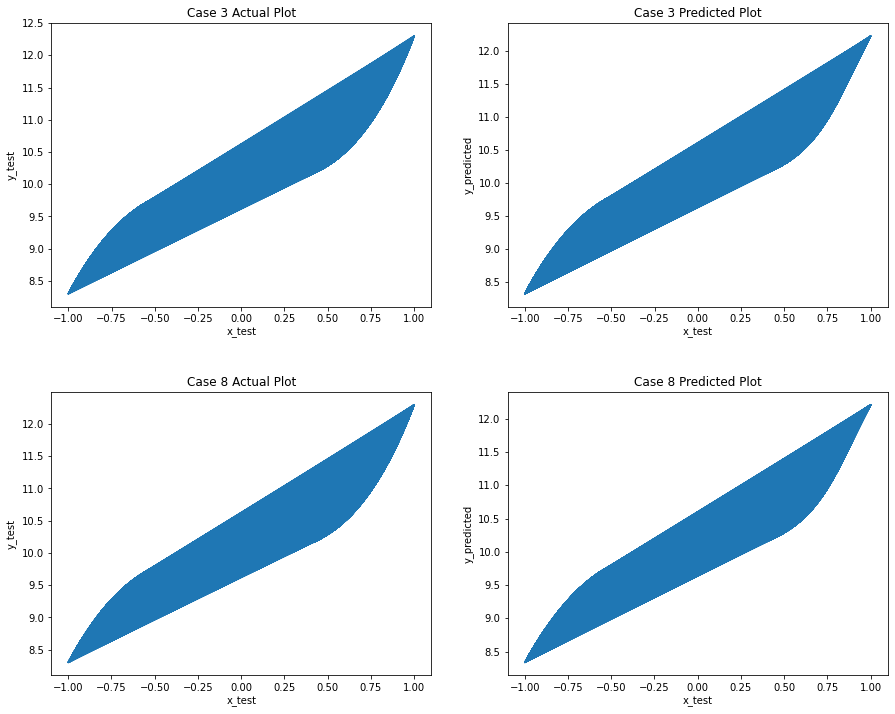

In [55]:
# Building the model for case 1:
case_three = build_model_one('tanh')

# Fitting case one model with data set
case_three.fit(x_train, y_train, epochs=20, batch_size=12, validation_data=(x_val, y_val))

# Predicting values using the first neural network
predicted_three = case_three.predict(x_test).reshape(15000)

# Plotting the two graphs 
fig, pos = plt.subplots(2, 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.3)

# Actual test data plot
pos[0, 0].set_title(f'Case 3 Actual Plot')
pos[0, 0].set(xlabel='x_test', ylabel='y_test')
pos[0, 0].plot(x_test, y_test)

# Predicted data plot
pos[0, 1].set_title(f'Case 3 Predicted Plot')
pos[0, 1].set(xlabel='x_test', ylabel='y_predicted')
pos[0, 1].plot(x_test, predicted_three)

# Building the model for case 8:
case_eight = build_model_one('tanh')

# Fitting case one model with data set
case_eight.fit(x_train_unshuffled, y_train_unshuffled, epochs=20, batch_size=12, validation_data=(x_val_unshuffled, y_val_unshuffled))

# Predicting values using the first neural network
predicted_eight = case_eight.predict(x_test_unshuffled).reshape(15000)

# Actual test data plot
pos[1, 0].set_title(f'Case 8 Actual Plot')
pos[1, 0].set(xlabel='x_test', ylabel='y_test')
pos[1, 0].plot(x_test_unshuffled, y_test_unshuffled)

# Predicted data plot
pos[1, 1].set_title(f'Case 8 Predicted Plot')
pos[1, 1].set(xlabel='x_test', ylabel='y_predicted')
pos[1, 1].plot(x_test_unshuffled, predicted_eight)

# Metrics Calculations
mae_three, mse_three, rmse_three, r2_three = mae(predicted_three, y_test), mse(predicted_three, y_test), rmse(predicted_three, y_test), r2(predicted_three, y_test)
print(f'Calculated mae value for case 3: {mae_three}')
print(f'Calculated mse value for case 3: {mse_three}')
print(f'Calculated rmse value for case 3: {rmse_three}')
print(f'Calculated r2 value for case 3: {r2_three}')

mae_eight, mse_eight, rmse_eight, r2_eight = mae(predicted_eight, y_test_unshuffled), mse(predicted_eight, y_test_unshuffled), rmse(predicted_eight, y_test_unshuffled), r2(predicted_eight, y_test_unshuffled)
print(f'Calculated mae value for case 8: {mae_eight}')
print(f'Calculated mse value for case 8: {mse_eight}')
print(f'Calculated rmse value for case 8: {rmse_eight}')
print(f'Calculated r2 value for case 8: {r2_eight}')

## Case 4: 

- Data: Shuffled and scaled 
- NN structure: Structure 1
- Activation Function: relu

## +

## Case 9: 

- Data: Unshuffled and scaled 
- NN structure: Structure 1
- Activation Function: relu

Epoch 1/20
750/750 [==============================] - 1s 844us/step - loss: 0.0218 - mae: 0.0824 - mse: 0.0218 - val_loss: 0.0023 - val_mae: 0.0344 - val_mse: 0.0023
Epoch 2/20
750/750 [==============================] - 1s 713us/step - loss: 0.0012 - mae: 0.0241 - mse: 0.0012 - val_loss: 4.8890e-04 - val_mae: 0.0148 - val_mse: 4.8890e-04
Epoch 3/20
750/750 [==============================] - 1s 707us/step - loss: 3.5828e-04 - mae: 0.0134 - mse: 3.5828e-04 - val_loss: 2.3018e-04 - val_mae: 0.0118 - val_mse: 2.3018e-04
Epoch 4/20
750/750 [==============================] - 1s 752us/step - loss: 2.2845e-04 - mae: 0.0118 - mse: 2.2845e-04 - val_loss: 2.8445e-04 - val_mae: 0.0125 - val_mse: 2.8445e-04
Epoch 5/20
750/750 [==============================] - 1s 732us/step - loss: 1.8600e-04 - mae: 0.0104 - mse: 1.8600e-04 - val_loss: 1.5387e-04 - val_mae: 0.0090 - val_mse: 1.5387e-04
Epoch 6/20
750/750 [==============================] - 1s 733us/step - loss: 1.5847e-04 - mae: 0.0091 - mse: 1.5847

Epoch 13/20
750/750 [==============================] - 1s 704us/step - loss: 2.1912e-05 - mae: 0.0035 - mse: 2.1912e-05 - val_loss: 2.4481e-05 - val_mae: 0.0041 - val_mse: 2.4481e-05
Epoch 14/20
750/750 [==============================] - 1s 698us/step - loss: 2.3705e-05 - mae: 0.0037 - mse: 2.3705e-05 - val_loss: 1.1015e-05 - val_mae: 0.0023 - val_mse: 1.1015e-05
Epoch 15/20
750/750 [==============================] - 1s 690us/step - loss: 2.5129e-05 - mae: 0.0038 - mse: 2.5129e-05 - val_loss: 3.6817e-05 - val_mae: 0.0043 - val_mse: 3.6817e-05
Epoch 16/20
750/750 [==============================] - 1s 685us/step - loss: 2.7809e-05 - mae: 0.0039 - mse: 2.7809e-05 - val_loss: 1.3461e-05 - val_mae: 0.0024 - val_mse: 1.3461e-05
Epoch 17/20
750/750 [==============================] - 1s 695us/step - loss: 2.1654e-05 - mae: 0.0035 - mse: 2.1654e-05 - val_loss: 2.7382e-05 - val_mae: 0.0046 - val_mse: 2.7382e-05
Epoch 18/20
750/750 [==============================] - 1s 684us/step - loss: 2.1386e-

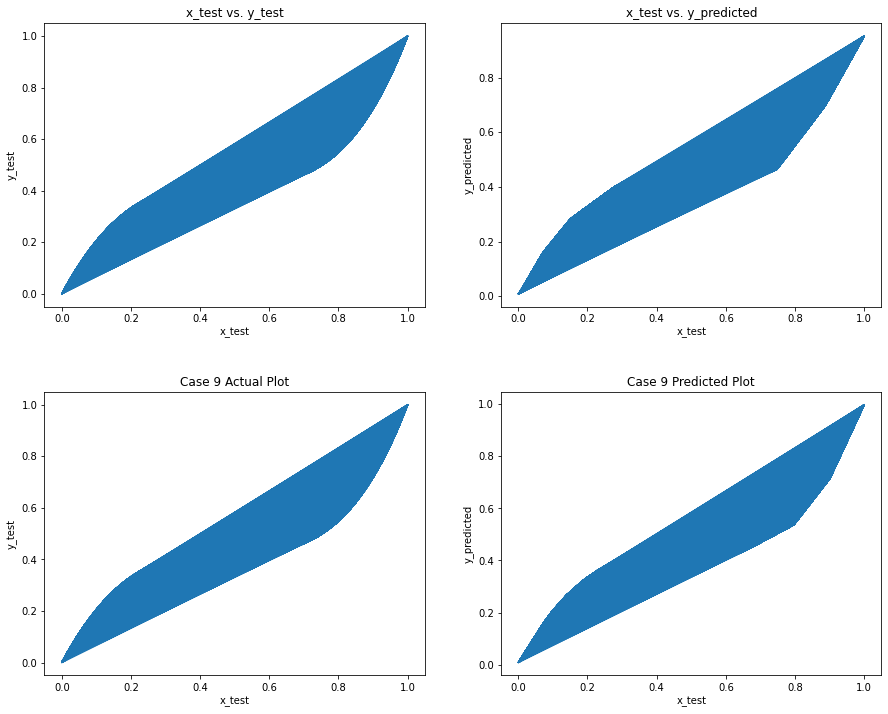

In [56]:
# Building the model for case 4:
case_four = build_model_one('relu')

# Fitting case one model with data set
case_four.fit(x_train_scaled, y_train_scaled, epochs=20, batch_size=12, validation_data=(x_val_scaled, y_val_scaled))

# Predicting values using the first neural network
predicted_four = case_four.predict(x_test_scaled).reshape(15000)

# Plotting the two graphs 
fig, pos = plt.subplots(2, 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.3)

# Actual test data plot
pos[0, 0].set_title(f'x_test vs. y_test')
pos[0, 0].set(xlabel='x_test', ylabel='y_test')
pos[0, 0].plot(x_test_scaled, y_test_scaled)

# Predicted data plot
pos[0, 1].set_title(f'x_test vs. y_predicted')
pos[0, 1].set(xlabel='x_test', ylabel='y_predicted')
pos[0, 1].plot(x_test_scaled, predicted_four)

# Building the model for case 9:
case_nine = build_model_one('relu')

# Fitting case 9 model with data set
case_nine.fit(x_train_scaled_unshuffled, y_train_scaled_unshuffled, epochs=20, batch_size=12, validation_data=(x_val_scaled_unshuffled, y_val_scaled_unshuffled))

# Predicting values
predicted_nine = case_nine.predict(x_test_scaled_unshuffled).reshape(15000)

# Actual test data plot
pos[1, 0].set_title(f'Case 9 Actual Plot')
pos[1, 0].set(xlabel='x_test', ylabel='y_test')
pos[1, 0].plot(x_test_scaled_unshuffled, y_test_scaled_unshuffled)

# Predicted data plot
pos[1, 1].set_title(f'Case 9 Predicted Plot')
pos[1, 1].set(xlabel='x_test', ylabel='y_predicted')
pos[1, 1].plot(x_test_scaled_unshuffled, predicted_nine)

# Metrics Calculations
mae_four, mse_four, rmse_four, r2_four = mae(predicted_four, y_test_scaled), mse(predicted_four, y_test_scaled), rmse(predicted_four, y_test_scaled), r2(predicted_four, y_test_scaled)
print(f'Calculated mae value for case 4: {mae_four}')
print(f'Calculated mse value for case 4: {mse_four}')
print(f'Calculated rmse value for case 4: {rmse_four}')
print(f'Calculated r2 value for case 4: {r2_four}')

mae_nine, mse_nine, rmse_nine, r2_nine = mae(predicted_nine, y_test_scaled_unshuffled), mse(predicted_nine, y_test_scaled_unshuffled), rmse(predicted_nine, y_test_scaled_unshuffled), r2(predicted_nine, y_test_scaled_unshuffled)
print(f'Calculated mae value for case 9: {mae_nine}')
print(f'Calculated mse value for case 9: {mse_nine}')
print(f'Calculated rmse value for case 9: {rmse_nine}')
print(f'Calculated r2 value for case 9: {r2_nine}')

## Case 5: 

- Data: Shuffled and scaled 
- NN structure: Structure 1
- Activation Function: tanh

## +

## Case 10: 

- Data: Unshuffled and scaled 
- NN structure: Structure 1
- Activation Function: tanh

Epoch 1/20
750/750 [==============================] - 1s 927us/step - loss: 0.0139 - mae: 0.0789 - mse: 0.0139 - val_loss: 0.0067 - val_mae: 0.0680 - val_mse: 0.0067
Epoch 2/20
750/750 [==============================] - 1s 760us/step - loss: 0.0068 - mae: 0.0679 - mse: 0.0068 - val_loss: 0.0065 - val_mae: 0.0674 - val_mse: 0.0065
Epoch 3/20
750/750 [==============================] - 1s 721us/step - loss: 0.0066 - mae: 0.0670 - mse: 0.0066 - val_loss: 0.0063 - val_mae: 0.0669 - val_mse: 0.0063
Epoch 4/20
750/750 [==============================] - 1s 738us/step - loss: 0.0065 - mae: 0.0670 - mse: 0.0065 - val_loss: 0.0071 - val_mae: 0.0725 - val_mse: 0.0071
Epoch 5/20
750/750 [==============================] - 1s 698us/step - loss: 0.0066 - mae: 0.0671 - mse: 0.0066 - val_loss: 0.0069 - val_mae: 0.0673 - val_mse: 0.0069
Epoch 6/20
750/750 [==============================] - 1s 714us/step - loss: 0.0063 - mae: 0.0663 - mse: 0.0063 - val_loss: 0.0059 - val_mae: 0.0652 - val_mse: 0.0059
Epoc

Epoch 15/20
750/750 [==============================] - 1s 753us/step - loss: 7.0332e-05 - mae: 0.0064 - mse: 7.0332e-05 - val_loss: 5.1726e-05 - val_mae: 0.0057 - val_mse: 5.1726e-05
Epoch 16/20
750/750 [==============================] - 1s 839us/step - loss: 6.0047e-05 - mae: 0.0060 - mse: 6.0047e-05 - val_loss: 6.2800e-05 - val_mae: 0.0064 - val_mse: 6.2800e-05
Epoch 17/20
750/750 [==============================] - 1s 730us/step - loss: 5.7255e-05 - mae: 0.0058 - mse: 5.7255e-05 - val_loss: 1.4933e-04 - val_mae: 0.0109 - val_mse: 1.4933e-04
Epoch 18/20
750/750 [==============================] - 1s 741us/step - loss: 6.4134e-05 - mae: 0.0061 - mse: 6.4134e-05 - val_loss: 6.9186e-05 - val_mae: 0.0068 - val_mse: 6.9186e-05
Epoch 19/20
750/750 [==============================] - 1s 735us/step - loss: 4.7980e-05 - mae: 0.0054 - mse: 4.7980e-05 - val_loss: 4.4053e-05 - val_mae: 0.0053 - val_mse: 4.4053e-05
Epoch 20/20
750/750 [==============================] - 1s 757us/step - loss: 4.7910e-

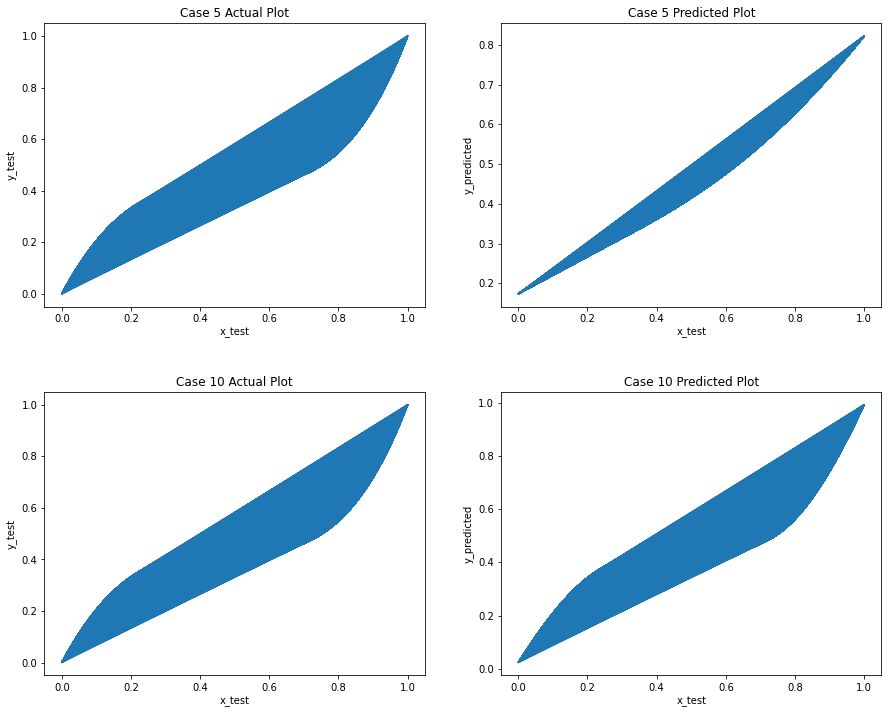

In [62]:
# Building the model for case 5:
case_five = build_model_one('tanh')

# Fitting case one model with data set
case_five.fit(x_train_scaled, y_train_scaled, epochs=20, batch_size=12, validation_data=(x_val_scaled, y_val_scaled))

# Predicting values using the first neural network
predicted_five = case_five.predict(x_test_scaled).reshape(15000)

# Plotting the two graphs 
fig, pos = plt.subplots(2, 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.3)

# Actual test data plot
pos[0, 0].set_title(f'Case 5 Actual Plot')
pos[0, 0].set(xlabel='x_test', ylabel='y_test')
pos[0, 0].plot(x_test_scaled, y_test_scaled)

# Predicted data plot
pos[0, 1].set_title(f'Case 5 Predicted Plot')
pos[0, 1].set(xlabel='x_test', ylabel='y_predicted')
pos[0, 1].plot(x_test_scaled, predicted_five)


# Building the model for case 10:
case_ten = build_model_one('tanh')

# Fitting case 10 model with data set
case_ten.fit(x_train_scaled_unshuffled, y_train_scaled_unshuffled, epochs=20, batch_size=12, validation_data=(x_val_scaled_unshuffled, y_val_scaled_unshuffled))

# Predicting values
predicted_ten = case_ten.predict(x_test_scaled_unshuffled).reshape(15000)

# Actual test data plot
pos[1, 0].set_title(f'Case 10 Actual Plot')
pos[1, 0].set(xlabel='x_test', ylabel='y_test')
pos[1, 0].plot(x_test_scaled_unshuffled, y_test_scaled_unshuffled)

# Predicted data plot
pos[1, 1].set_title(f'Case 10 Predicted Plot')
pos[1, 1].set(xlabel='x_test', ylabel='y_predicted')
pos[1, 1].plot(x_test_scaled_unshuffled, predicted_ten)

# Metrics Calculations
mae_five, mse_five, rmse_five, r2_five = mae(predicted_five, y_test_scaled), mse(predicted_five, y_test_scaled), rmse(predicted_five, y_test_scaled), r2(predicted_five, y_test_scaled)
print(f'Calculated mae value for case 5: {mae_five}')
print(f'Calculated mse value for case 5: {mse_five}')
print(f'Calculated rmse value for case 5: {rmse_five}')
print(f'Calculated r2 value for case 5: {r2_five}')

mae_ten, mse_ten, rmse_ten, r2_ten = mae(predicted_ten, y_test_scaled_unshuffled), mse(predicted_ten, y_test_scaled_unshuffled), rmse(predicted_ten, y_test_scaled_unshuffled), r2(predicted_ten, y_test_scaled_unshuffled)
print(f'Calculated mae value for case 10: {mae_ten}')
print(f'Calculated mse value for case 10: {mse_ten}')
print(f'Calculated rmse value for case 10: {rmse_ten}')
print(f'Calculated r2 value for case 10: {r2_ten}')